In [1]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

import numpy as np

from modules.MDS import MultiDimensionalScaler, squared_distance_matrix

In [2]:
D2 = np.asarray([[0, 5],
                 [5, 0],])

mds = MultiDimensionalScaler(D2)


# 次元削減後の座標
new_axis = mds.embed()
print(new_axis)

print()

# 次元削減後の座標の次元
dim = mds.minimal_dimension()
print(f"次元削減後の座標の次元 : {dim}")

[[-1.11803399 -1.11803399]]

次元削減後の座標の次元 : 2


In [20]:
# データフレームからMDSを実施する

import pandas as pd
import numpy as np

data = [{"id": 1, "data_A": 1, "data_B": 3, "data_C": 0},
        {"id": 2, "data_A": 3, "data_B": 2, "data_C": -4},
        {"id": 3, "data_A": 3, "data_B": 4, "data_C": -1},
        {"id": 4, "data_A": 2, "data_B": 2, "data_C": 0},
        {"id": 5, "data_A": 4, "data_B": 1, "data_C": 3},
        ]

df = pd.DataFrame(data)
pos = np.asarray(df[["data_A", "data_B"]])
print(f"次元削減前の座標 : ")
print(pos)
print()

D2 = squared_distance_matrix(pos)
print("距離二乗行列")
print(D2)
print()
mds = MultiDimensionalScaler(D2)
# 次元削減後の座標
new_dim = 2
print(f"寄与度：{mds.contribution(k=new_dim)}")
print()

new_pos = mds.embed(k=new_dim)
print("次元削減後の座標 : ")
print(new_pos)
print()

print("距離二乗行列")
print(squared_distance_matrix(new_pos))
print()

次元削減前の座標 : 
[[1 3]
 [3 2]
 [3 4]
 [2 2]
 [4 1]]

距離二乗行列
[[ 0.  5.  5.  2. 13.]
 [ 5.  0.  4.  1.  2.]
 [ 5.  4.  0.  5. 10.]
 [ 2.  1.  5.  0.  5.]
 [13.  2. 10.  5.  0.]]

寄与度：0.9999999999999998

次元削減後の座標 : 
[[-1.55563492e+00  7.07106781e-01]
 [ 5.65685425e-01  2.28351819e-16]
 [-8.48528137e-01 -1.41421356e+00]
 [-1.41421356e-01  7.07106781e-01]
 [ 1.97989899e+00 -3.44748205e-16]]

距離二乗行列
[[ 0.  5.  5.  2. 13.]
 [ 5.  0.  4.  1.  2.]
 [ 5.  4.  0.  5. 10.]
 [ 2.  1.  5.  0.  5.]
 [13.  2. 10.  5.  0.]]



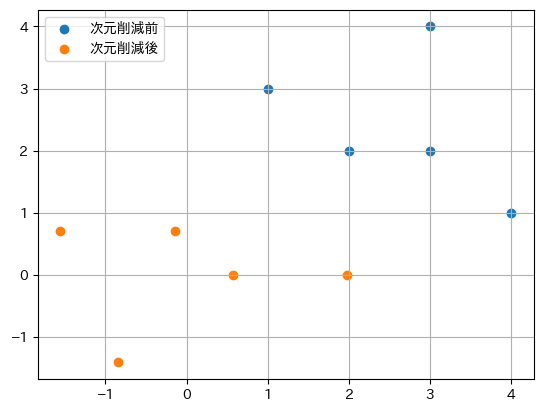

In [23]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.scatter(pos[:, 0], pos[:, 1], label="次元削減前")
plt.scatter(new_pos[:, 0], new_pos[:, 1], label="次元削減後")
plt.legend()
plt.grid()
plt.show()